# About Notebook

As part of Cognizant Digital Business, Cognizant’s Artificial Intelligence and Data Analytics Practice provides advanced data collection and management expertise, as well as artificial intelligence and analytics capabilities that help clients create highly personalized digital experiences, products and services at every touchpoint of the customer journey.

In this program, i have the opportunity to step into the shoes of a Cognizant team member and complete tasks that replicate the work that our Artificial Intelligence team does every day. I have learn how to perform exploratory data analysis, communicate results of a machine learning model, implement algorithm production, and review algorithm performance.

This program really provides a great resource for me to up-skill and strengthen my experience.


##  Client Data
 
**Gala Groceries** is a technology-led grocery store chain based in the USA. They rely heavily on new technologies, such as IoT to give them a competitive edge over other grocery stores. 

They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

Gala Groceries approached Cognizant to help them with a supply chain issue. Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. They want to know how to better stock the items that they sell.

This is a high-level business problem and will require you to dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.



---

# Data Explorations

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

## Preparing Data

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

### Read and Format Table

In [2]:
# Read file 
def goRead(name):
    df = pd.read_csv("../Model_Interpretations/" + name)
    return df

#Drop unnamed: 0
def dropUnnamed(data):
    data.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
    return data


In [3]:
sales_df = dropUnnamed(goRead('sales.csv'))
stock_df = dropUnnamed(goRead('sensor_stock_levels.csv'))
storage_df = dropUnnamed(goRead('sensor_storage_temperature.csv'))


## Todo With Data

### Checking and Cleaning Sales Data

In [4]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [6]:
sales_df.isna().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [7]:
sales_df.duplicated().sum()

0

In [8]:
#set datetime format 
def setTime(data):
    data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')
    return data['timestamp']

# get hourly data
def getHours(x):
    x = x.dt.floor("H")
    return x


In [9]:
sales_df['timestamp'] = getHours(setTime(sales_df))

In [10]:
# sales_df.payment_type.unique() #'e-wallet', 'debit card', 'cash', 'credit card'
# sales_df.customer_type.unique() # 'gold', 'standard', 'premium', 'basic', 'non-member'
sales_df.category.unique()

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

### Checking and Cleaning Stock Data

In [11]:
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [12]:
stock_df['timestamp'] = getHours(setTime(stock_df))

### Checking and Cleaning Storage Data

In [13]:
storage_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [14]:
storage_df['timestamp'] = getHours(setTime(storage_df))

## Joining Data

In [15]:
# plt.figure(figsize=(10, 6))
# ax = sns.boxplot(data=sales_df, x='category', y='quantity')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# ax.tick_params(axis='x', labelsize=8)

# # Set axis labels and title
# plt.xlabel('Category')
# plt.ylabel('Quantity')
# plt.title('Box Plot of Quantity by Category')

# plt.show()

In [16]:
# sns.histplot(data=sales_df, x='customer_type', hue='payment_type', kde=False)
# plt.xlabel('Customer Payment')
# plt.ylabel('Count')
# plt.title('Histogram of Quantity by Customer Type')
# plt.show()

In [17]:
def aggTable(file, group: list, agg: dict):
    file = file.groupby(group).agg(agg).reset_index()
    return file

In [18]:
group = ['timestamp', 'product_id']
agg_sales = {'quantity': 'sum'}
agg_stock = {'estimated_stock_pct': 'mean'}
agg_storage = {'temperature': 'mean'}

sales_group = aggTable(sales_df, group, agg_sales)
stock_group = aggTable(stock_df, group, agg_stock)
storage_group = aggTable(storage_df, group[0], agg_storage)

In [19]:
print(type(storage_group))

<class 'pandas.core.frame.DataFrame'>


In [20]:
def mergeTable(bfr, aftr, on: list):
    merged = bfr.merge(aftr, on=on, how='left')
    return merged

merged_df = mergeTable(stock_group, sales_group, group)

merged_df = mergeTable(merged_df, storage_group, group[0])

merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


At this point, we can add more variables which might affect the prediction.
Since 'price' and 'total' are dependant, let's add only one them 'price'.
We can also merge 'category'. 'customer_type', and 'payment_type' are not unique to the product_id but the transaction_id which is not present in this merged_df.

In [21]:
product_categories = sales_df[['product_id', 'category', 'unit_price', 'customer_type',	'total',	'payment_type']]

product_categories = product_categories.drop_duplicates()

merged_df = mergeTable(merged_df, product_categories, group[1])

After merging 3 datasets, there are clearly some missing values ine the merged dataframe. let's replace those values with Zeroes.

<Axes: >

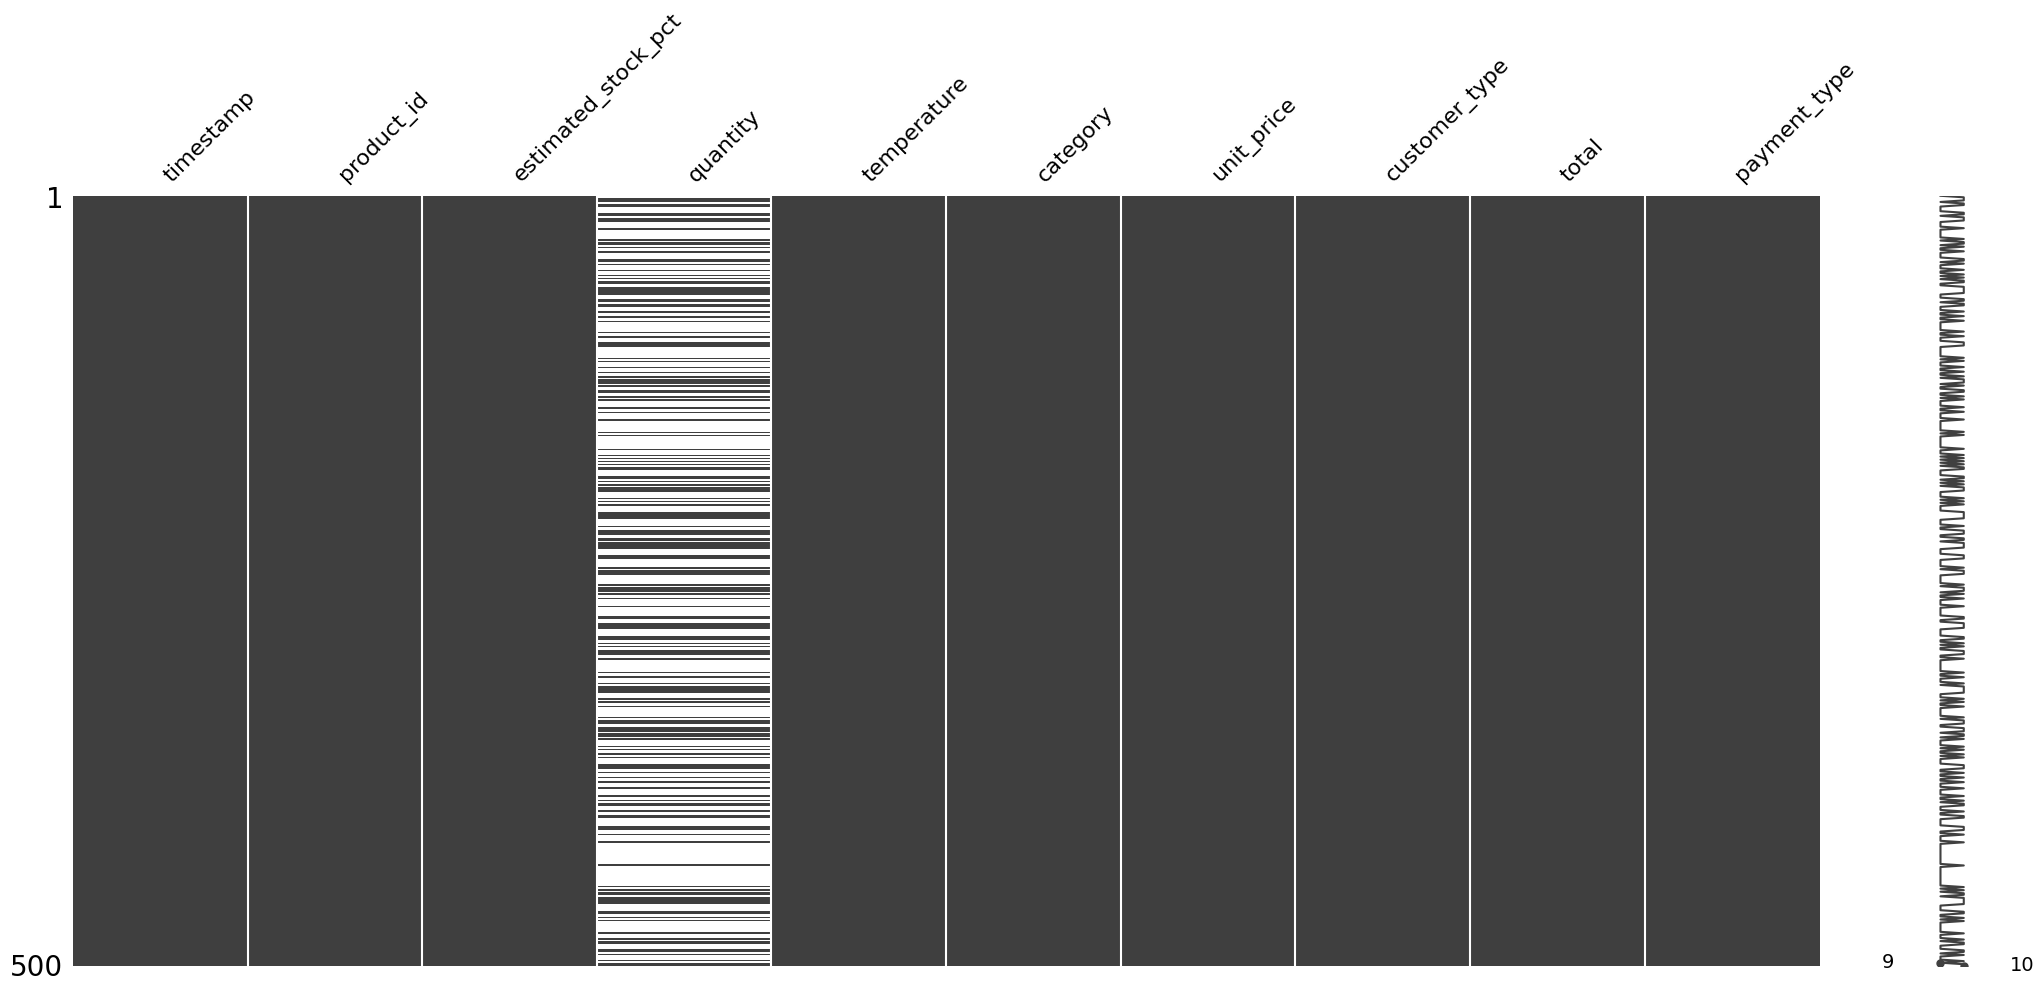

In [22]:
msno.matrix(merged_df.sample(500))

In [23]:
# fillna with 0 for quantities 
merged_df['quantity'] = merged_df['quantity'].fillna(0)

### check date column

In [24]:
merged_df['hour_only'] = merged_df['timestamp'].dt.hour
merged_df['date_only'] = merged_df['timestamp'].dt.date.astype('datetime64[ns]')
# merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,customer_type,total,payment_type,hour_only,date_only
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,premium,22.38,debit card,9,2022-03-01
1,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,standard,22.38,e-wallet,9,2022-03-01
2,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,gold,11.19,e-wallet,9,2022-03-01
3,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,basic,33.57,credit card,9,2022-03-01
4,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,basic,33.57,e-wallet,9,2022-03-01


# Time to EDA 

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237901 entries, 0 to 237900
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   timestamp            237901 non-null  datetime64[ns]
 1   product_id           237901 non-null  object        
 2   estimated_stock_pct  237901 non-null  float64       
 3   quantity             237901 non-null  float64       
 4   temperature          237901 non-null  float64       
 5   category             237901 non-null  object        
 6   unit_price           237901 non-null  float64       
 7   customer_type        237901 non-null  object        
 8   total                237901 non-null  float64       
 9   payment_type         237901 non-null  object        
 10  hour_only            237901 non-null  int32         
 11  date_only            237901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int32(1), object(4)
memory usage: 20.9

In [26]:
merged_df = merged_df.drop_duplicates()

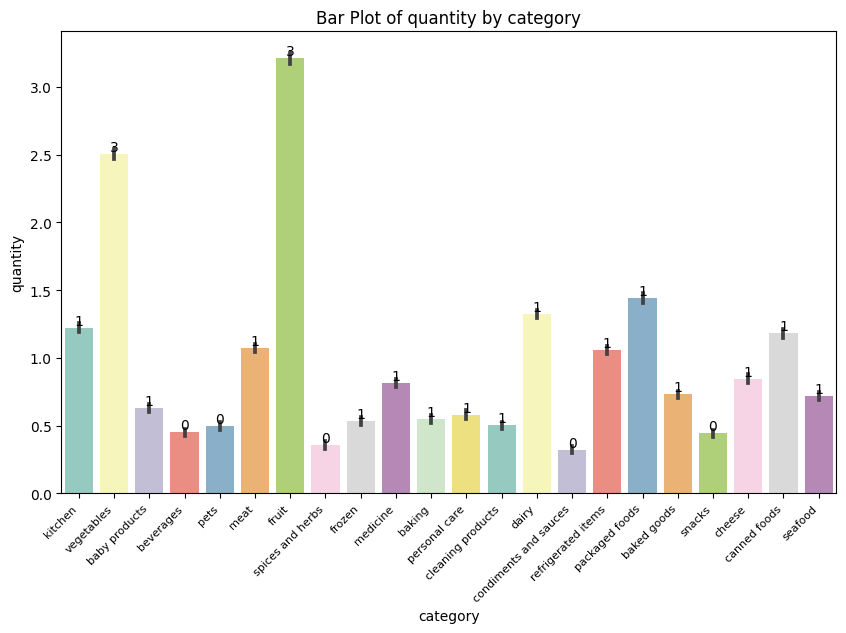

In [27]:
def create_bar_plot(data, x, y, hue=None, palette='Set3', rotation=45, labelsize=8):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right')
    ax.tick_params(axis='x', labelsize=labelsize)

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    # Set axis labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Bar Plot of {y} by {x}')

    plt.show()

create_bar_plot(merged_df, 'category', 'quantity')


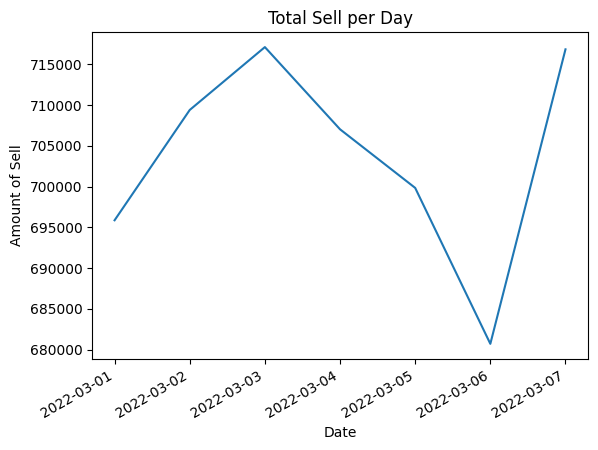

In [28]:
# Total amount of Sells per day and what catgeory

total_sell_day_cat = merged_df.groupby('date_only')['total'].sum()

total_sell_day_cat = total_sell_day_cat.sort_values(ascending = False)
total_sell_day_cat.plot(kind = 'line', 
                 xlabel = 'Date',
                 ylabel = 'Amount of Sell',
                 title = 'Total Sell per Day')
plt.show()

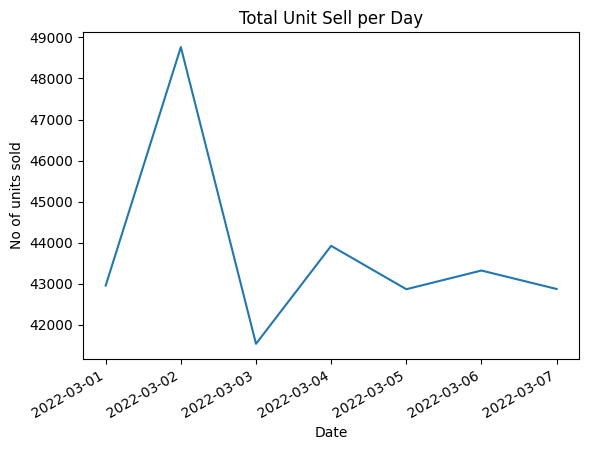

In [29]:
# Total unit sell per day and what catgeory

unit_sell_day_cat = merged_df.groupby('date_only')['quantity'].sum()

unit_sell_day_cat = unit_sell_day_cat.sort_values(ascending = False)
unit_sell_day_cat.plot(kind = 'line', 
                 xlabel = 'Date',
                 ylabel = 'No of units sold',
                 title = 'Total Unit Sell per Day')
plt.show()

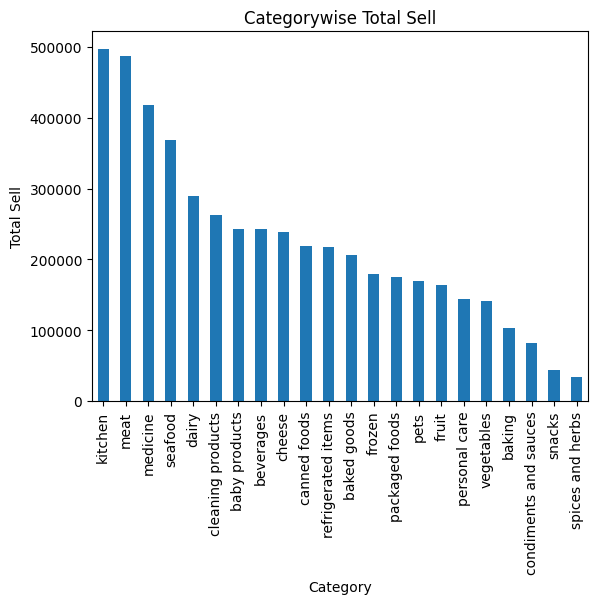

In [30]:
## Category wise total sell

sell_cat = merged_df.groupby('category')['total'].sum()

sell_cat = sell_cat.sort_values(ascending = False)
sell_cat.plot(kind = 'bar',
             xlabel = 'Category',
             ylabel = 'Total Sell',
             title = 'Categorywise Total Sell')
plt.show()

In [31]:
# # Sort the DataFrame by 'timestamp' column
# data_df = merged_df.sort_values('timestamp')

# # Plotting the distribution of 'estimated_stock_pct'
# plt.figure(figsize=(10, 6))
# sns.histplot(data=data_df, x='estimated_stock_pct', kde=True)
# plt.xlabel('Estimated Stock %')
# plt.ylabel('Count')
# plt.title('Distribution of Estimated Stock %')

# plt.show()

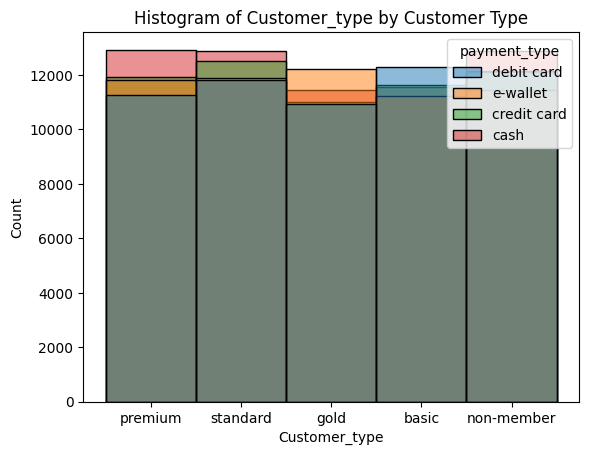

In [33]:
def create_histogram(data, x, hue=None, kde=False):
    sns.histplot(data=data, x=x, hue=hue, kde=kde)
    plt.xlabel(x.capitalize())
    plt.ylabel('Count')
    plt.title(f'Histogram of {x.capitalize()} by Customer Type')
    plt.show()

create_histogram(merged_df, 'customer_type', hue='payment_type', kde=False)


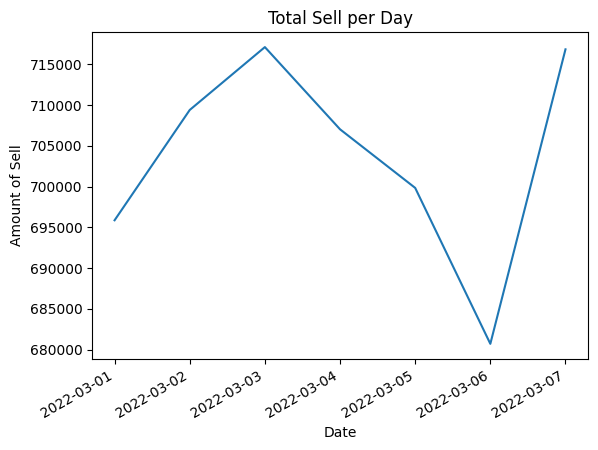

In [34]:
# Total amount of Sells per day and what catgeory

total_sell_day_cat = merged_df.groupby('date_only')['total'].sum()

total_sell_day_cat = total_sell_day_cat.sort_values(ascending = False)
total_sell_day_cat.plot(kind = 'line', 
                 xlabel = 'Date',
                 ylabel = 'Amount of Sell',
                 title = 'Total Sell per Day')
plt.show()

In [35]:
merged_df.describe()

,timestamp,estimated_stock_pct,quantity,temperature,unit_price,total,hour_only,date_only
count,237901,237901.000000,237901.000000,237901.000000,237901.000000,237901.000000,237901.000000,237901
mean,2022-03-04 14:04:45.880260864,0.506020,1.287321,-0.208386,8.204741,20.709417,14.004557,2022-03-04 00:04:29.476799232
min,2022-03-01 09:00:00,0.010000,0.000000,-1.847270,0.190000,0.190000,9.000000,2022-03-01 00:00:00
25%,2022-03-02 17:00:00,0.300000,0.000000,-0.657082,3.990000,7.470000,11.000000,2022-03-02 00:00:00
50%,2022-03-04 14:00:00,0.503333,0.000000,-0.230631,7.490000,15.960000,14.000000,2022-03-04 00:00:00
75%,2022-03-06 11:00:00,0.710000,2.000000,0.160429,11.490000,29.960000,17.000000,2022-03-06 00:00:00
max,2022-03-07 19:00:00,1.000000,15.000000,1.435938,23.990000,95.960000,19.000000,2022-03-07 00:00:00
std,NaN,0.262230,2.149458,0.649429,5.462801,17.854493,3.167850,NaN


In [52]:
# Calculate the correlation matrix
corr_matrix = merged_df.corr()

# Apply background gradient to the correlation matrix
styled_corr_matrix = corr_matrix.style.background_gradient('Greens')

# Display the styled correlation matrix
styled_corr_matrix

,timestamp,estimated_stock_pct,quantity,temperature,category,unit_price,customer_type,total,payment_type,hour_only,date_only
timestamp,1.000000,0.010774,-0.010069,-0.043028,0.000122,-0.003263,0.000207,-0.003486,-0.001627,0.075482,0.997838
estimated_stock_pct,0.010774,1.000000,0.016733,0.005840,0.002698,-0.028659,0.000454,-0.021309,0.000000,0.018762,0.009568
quantity,-0.010069,0.016733,1.000000,-0.015003,0.114547,-0.205412,-0.003353,-0.157705,0.012041,0.006170,-0.010504
temperature,-0.043028,0.005840,-0.015003,1.000000,0.006541,-0.002774,-0.001883,-0.003087,0.001065,0.057238,-0.046922
category,0.000122,0.002698,0.114547,0.006541,1.000000,-0.190698,-0.008437,-0.146414,-0.003783,-0.001289,0.000208
unit_price,-0.003263,-0.028659,-0.205412,-0.002774,-0.190698,1.000000,0.000376,0.784824,-0.011817,-0.006828,-0.002822
customer_type,0.000207,0.000454,-0.003353,-0.001883,-0.008437,0.000376,1.000000,0.007035,-0.016819,0.000165,0.000196
total,-0.003486,-0.021309,-0.157705,-0.003087,-0.146414,0.784824,0.007035,1.000000,-0.026432,-0.004689,-0.003186
payment_type,-0.001627,0.000000,0.012041,0.001065,-0.003783,-0.011817,-0.016819,-0.026432,1.000000,-0.001411,-0.001539
hour_only,0.075482,0.018762,0.006170,0.057238,-0.001289,-0.006828,0.000165,-0.004689,-0.001411,1.000000,0.009781


# Modeling

In [38]:
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,customer_type,total,payment_type,hour_only,date_only
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,premium,22.38,debit card,9,2022-03-01
1,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,standard,22.38,e-wallet,9,2022-03-01
2,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,gold,11.19,e-wallet,9,2022-03-01
3,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,basic,33.57,credit card,9,2022-03-01
4,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,basic,33.57,e-wallet,9,2022-03-01


Feature Engineering

In [39]:
merged_df.drop(columns=['product_id'], inplace=True)

Now that we have only one categorical variable, we can use ordinal encoding to convert it into numerical columns.

In [67]:
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.model_selection import train_test_split

# categorical_cols = [cname for cname in merged_df.columns if merged_df[cname].dtype == "object"]

# ordinal_encoder = OrdinalEncoder()
# merged_df[categorical_cols] = ordinal_encoder.fit_transform(merged_df[categorical_cols])


y = merged_df['estimated_stock_pct']
X = merged_df.drop(['estimated_stock_pct', 'timestamp', 'date_only'], axis=1)

print(X.shape)
print(y.shape)
# # y = merged_df['estimated_stock_pct']
# # X = merged_df.drop(['estimated_stock_pct'], axis=1)

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
#                                                                 random_state=0)

# numerical_cols = [cname for cname in merged_df.columns if merged_df[cname].dtype in ['int64', 'float64']]
# print("Numerical variables:")
# print(numerical_cols)

(237901, 8)
(237901,)


In [68]:
X.head()

,quantity,temperature,category,unit_price,customer_type,total,payment_type,hour_only
0,3.0,-0.02885,11.0,11.19,3.0,22.38,2.0,9
1,3.0,-0.02885,11.0,11.19,4.0,22.38,3.0,9
2,3.0,-0.02885,11.0,11.19,1.0,11.19,3.0,9
3,3.0,-0.02885,11.0,11.19,0.0,33.57,1.0,9
4,3.0,-0.02885,11.0,11.19,0.0,33.57,3.0,9


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

K = 10 #Many folds we want to complete in this training
split = 0.75 #split 75/25%

In [65]:
accuracy = []

for fold in range(0, K):

  # Instantiate algorithm
  model = RandomForestRegressor()
  scaler = StandardScaler()

  # Create training and test samples
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # Train model
  trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
  y_pred = trained_model.predict(X_test)

  # Compute accuracy, using mean absolute error
  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")


Fold 1: MAE = 0.023
Fold 2: MAE = 0.022
Fold 3: MAE = 0.022
Fold 4: MAE = 0.023
Fold 5: MAE = 0.023
Fold 6: MAE = 0.022
Fold 7: MAE = 0.023
Fold 8: MAE = 0.023
Fold 9: MAE = 0.023
Fold 10: MAE = 0.022
Average MAE: 0.02


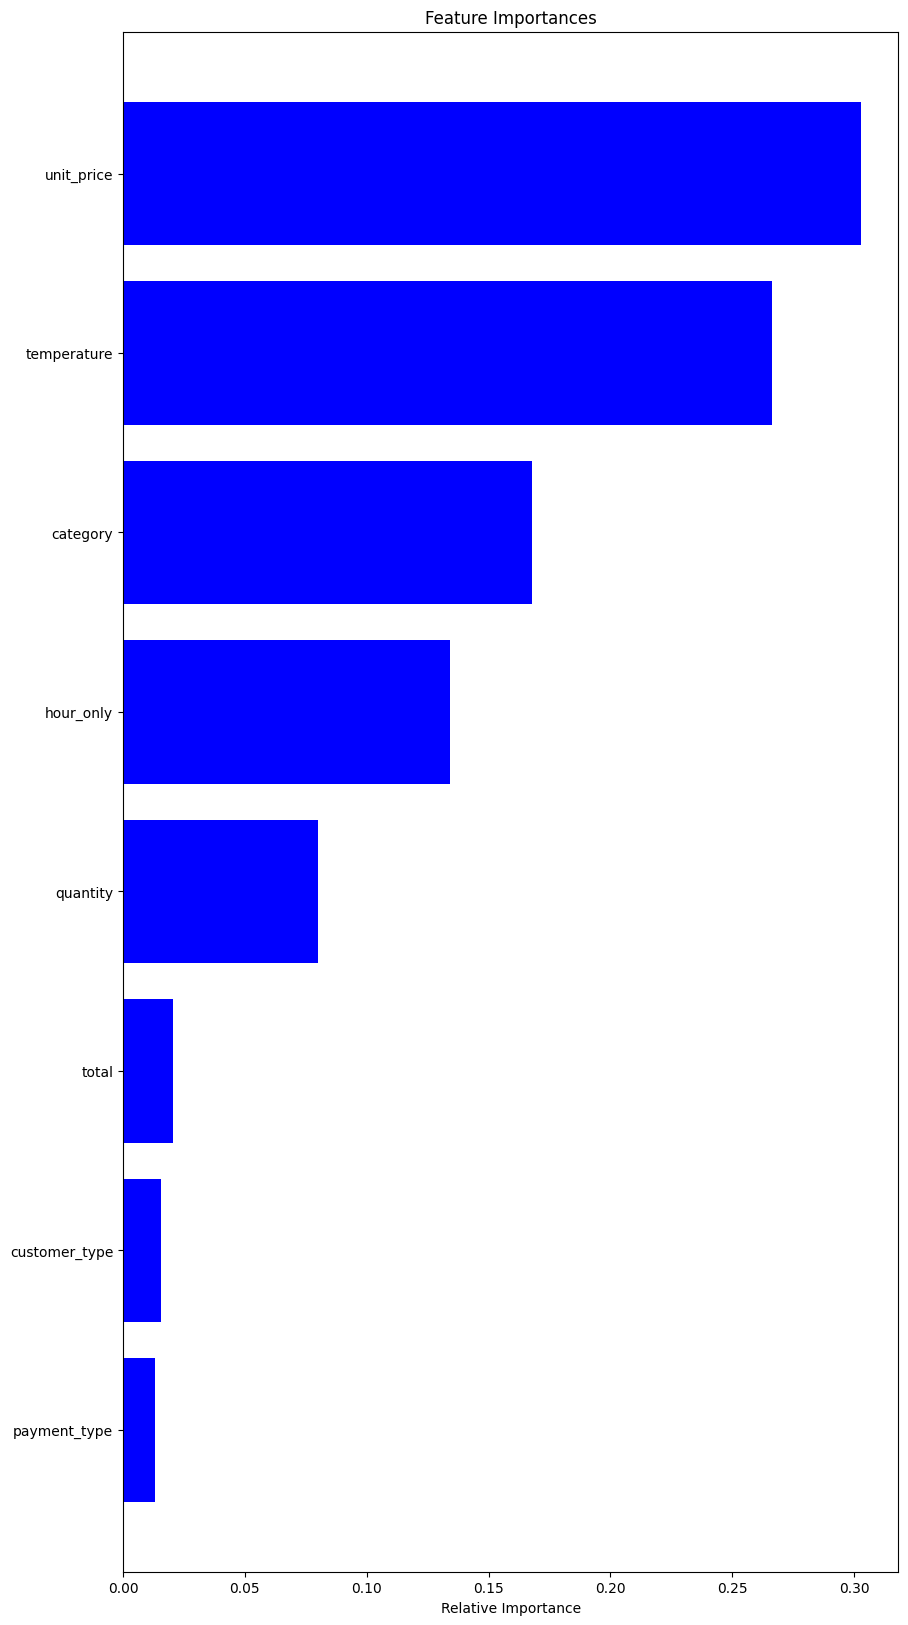

In [66]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()